In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("gurgaon_10kk_After_EDA1_.csv").sort_values("PRICE").reset_index(drop=True)
print(df.shape)
df.head(2)

(10032, 34)


,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER
0,70480214,j70480214,gurgaon,5500.0,15.0,350.0,3.0,1 bhk flat in sector 107 gurgaon,very much demanding property at dwarka express...,residential apartment,Unfurnished,5,0-1 Year Old Property,high rise,1.0,signature global solera 2,2.0,low rise,28.512525,76.973543,1.0,sector 107 gurgaon,signature global solera 2,signature global solera 2,NaN,1,0,0,0,0,2,86,1,1
1,70794112,u70794112,gurgaon,7000.0,10.0,700.0,15.0,1 bhk flat in sector 95 gurgaon,"rof ananda , sector 95, near to wazirpur villa...",residential apartment,Semifurnished,3,0-1 Year Old Property,high rise,1.0,rof ananda,1.0,mid rise,28.484814,77.080853,1.0,sector 95 gurgaon,rof ananda,rof ananda,218,2,0,0,0,0,7,63,1,2


In [4]:
df['PROPERTY_TYPE'].value_counts()

residential apartment        5952
independent/builder floor    2470
residential land              989
independent house/villa       621
Name: PROPERTY_TYPE, dtype: int64

## residential apartment

In [5]:
df1 = df[df['PROPERTY_TYPE'] == 'residential apartment']
df1.shape

(5952, 34)

In [6]:
df1['PRICE'].max()

550000000.0

In [18]:
rent_rows['DESCRIPTION'].explode().tolist()

['very much demanding property at dwarka express way gurgaon good connectivity and all aminites srounding near by',
 'rof ananda , sector 95, near to wazirpur village and imt manesar, main pataudi road, gurgaon, haryana\n\n\n1 bhk rent :rs. 7000 per month ((all inclusive - maintenance & others ) with fan, tubelight, certain rods\n\n\n2 and 3 bhk rent : rs.8500 to rs. 9000 per month ((all inclusive - maintenance & others ) with fan, tubelight, certain rods\n\n\n\n\nsociety flats\n\n24 hour secured gated community\ncommunity hall for social gathering\nretail market in premises for daily requirements\n24*7 securities for common area \n\n\nallotted parking\neach home with vaastu concept\npark for children\n15 min away from nh8\n6.50 acre township\nbasketball courts\nbadminton court\ncycle track\nskating rink\ngym\nchildren park\nyoga area\nsenior citizens park\njogging track',
 'cheap rent and best place and location at dwarka express way gurgaon',
 'rof ananda , sector 95, near to wazirpu

In [19]:
df2 =df1[df1['DESCRIPTION'].str.contains("sale")]
df3 =df1[df1['DESCRIPTION'].str.contains("rent")]

In [11]:
## Alternate ways to to extract data 

import re
def extraction(x):
    match =  re.search(r'sale', x)
    if match:
        return 'sale'
    else:
        return 'rent'

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
df1.loc[:, 'EXTRACTION_RESULT'] = df1['DESCRIPTION'].apply(extraction)

In [14]:
rent_rows = df1[df1['EXTRACTION_RESULT'] == 'rent']
sale_rows = df1[df1['EXTRACTION_RESULT'] == 'sale']


In [21]:
sale_rows

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER,EXTRACTION_RESULT
443,70267226,e70267226,gurgaon,30000.0,12.0,2475.0,11.0,4 bhk flat in sector 92 gurgaon,4bhk for sale in bestech park view sanskruti s...,residential apartment,Semifurnished,3,5-10 Year Old Property,high rise,4.0,bestech park view sanskruti,4.0,mid rise,28.409826,76.926056,4.0,sector 92 gurgaon,bestech park view sanskruti,bestech park view sanskruti,sector 84 gurgaon,1,1,1,2,1,3,90,1,1,sale
753,70996466,m70996466,gurgaon,37500.0,28.0,1296.0,12.0,2 bhk flat in sector 67a gurgaon,its 2bhk with store room semi furnished apartm...,residential apartment,Semifurnished,1,1-5 Year Old Property,high rise,2.0,ireo the corridors,2.0,mid rise,28.386101,77.070028,2.0,sector 67a gurgaon,ireo the corridors,ireo the corridors,NaN,1,2,1,2,0,1,124,1,3,sale
996,70733210,p70733210,gurgaon,45000.0,18.0,2450.0,14.0,3 bhk flat in sector 104 gurgaon,this society is situated right on dwarka expre...,residential apartment,Semifurnished,3,5-10 Year Old Property,high rise,3.0,puri emerald bay,4.0,high rise,28.482289,76.991786,3.0,sector 104 gurgaon,puri emerald bay,puri emerald bay,NaN,2,1,1,3,1,2,106,1,1,sale
1079,70997730,n70997730,gurgaon,45000.0,26.0,1727.0,12.0,3 bhk flat in sector 67a gurgaon,its 3bhk semi furnished apartment is available...,residential apartment,Semifurnished,3,1-5 Year Old Property,high rise,3.0,ireo the corridors,3.0,mid rise,28.386101,77.070028,3.0,sector 67a gurgaon,ireo the corridors,ireo the corridors,NaN,1,2,1,2,0,1,133,1,3,sale
1520,70096444,k70096444,gurgaon,60000.0,41.0,1443.0,4.0,3 bhk flat in dlf phase 4,"flat for rent dlf ridgewood estate 3br,area 13...",residential apartment,Furnished,5,1-5 Year Old Property,high rise,3.0,dlf ridgewood estate,4.0,low rise,28.464937,77.080879,3.0,dlf phase 4,dlf ridgewood estate,dlf ridgewood estate,tower-c,1,0,1,0,0,0,118,1,3,sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10022,68650922,s68650922,gurgaon,420000000.0,60008.0,7400.0,15.0,4 bhk flat in sector 42 gurgaon,looking for a 4 bhk property for sale in gurga...,residential apartment,Semifurnished,5,5-10 Year Old Property,high rise,4.0,dlf the camellias,4.0,mid rise,28.454897,77.105367,4.0,sector 42 gurgaon,dlf the camellias,dlf the camellias,a 210,2,2,1,2,1,1,141,1,3,sale
10024,70006602,j70006602,gurgaon,440000000.0,59459.0,7400.0,15.0,4 bhk flat in sector 42 gurgaon,check out this 4 bhk apartment for sale in dlf...,residential apartment,Semifurnished,0,5-10 Year Old Property,high rise,4.0,dlf the camellias,4.0,high rise,28.458598,77.108078,4.0,sector 42 gurgaon,dlf the camellias,dlf the camellias,NaN,2,2,1,2,1,1,0,1,0,sale
10027,70270684,f70270684,gurgaon,500000000.0,67567.0,7400.0,15.0,4 bhk flat in sector 42 gurgaon,dlf the camellias is one of the most popular d...,residential apartment,Furnished,3,0-1 Year Old Property,high rise,4.0,dlf the camellias,4.0,mid rise,28.458598,77.108078,4.0,sector 42 gurgaon,dlf the camellias,dlf the camellias,NaN,2,2,1,2,1,1,138,1,3,sale
10028,70877280,b70877280,gurgaon,500000000.0,67851.0,7369.0,15.0,4 bhk flat in sector 42 gurgaon,luxury deals by expert \n\n7400 sq ft exclusiv...,residential apartment,not available,1,1-5 Year Old Property,high rise,4.0,dlf the camellias,3.0,high rise,28.458598,77.108078,4.0,sector 42 gurgaon,dlf the camellias,dlf the camellias,NaN,2,2,1,2,1,1,110,1,1,sale


In [15]:
counts = df1['EXTRACTION_RESULT'].value_counts()
print(counts)

rent    4243
sale    1709
Name: EXTRACTION_RESULT, dtype: int64


In [28]:
print(df3.shape)
print(df2.shape)

(1811, 34)
(1709, 34)


In [10]:
 df1[df1['PRICE'] == 5500.0]

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER
0,70480214,j70480214,gurgaon,5500.0,15.0,350.0,3.0,1 bhk flat in sector 107 gurgaon,very much demanding property at dwarka express...,residential apartment,Unfurnished,5,0-1 Year Old Property,high rise,1.0,signature global solera 2,2.0,low rise,28.512525,76.973543,1.0,sector 107 gurgaon,signature global solera 2,signature global solera 2,NaN,1,0,0,0,0,2,86,1,1


In [20]:
filtered_df

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER


In [6]:
 df1[df1['PRICE'] == 550000000]

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER
10029,23798278,g23798278,gurgaon,550000000.0,43478.0,11500.0,15.0,5 bhk flat in sector 42 gurgaon,"for sale - penthouse, in dlf - the magnolias, ...",residential apartment,Semifurnished,5,0-1 Year Old Property,high rise,5.0,dlf the magnolias,4.0,high rise,28.45382,77.09956,5.0,sector 42 gurgaon,dlf the magnolias,dlf the magnolias,"for sale - penthouse at dlf the magnolias, sec...",2,2,0,3,2,1,127,1,3


In [13]:
df1['PRICE'].describe()

count    5.952000e+03
mean     1.958057e+07
std      3.035574e+07
min      5.500000e+03
25%      8.400000e+04
50%      1.420000e+07
75%      2.550000e+07
max      5.500000e+08
Name: PRICE, dtype: float64

In [37]:
sale_rows['PRICE'].min()

30000.0

In [44]:
sale_rows[sale_rows['PRICE'] <1000000]

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER,EXTRACTION_RESULT
443,70267226,e70267226,gurgaon,30000.0,12.0,2475.0,11.0,4 bhk flat in sector 92 gurgaon,4bhk for sale in bestech park view sanskruti s...,residential apartment,Semifurnished,3,5-10 Year Old Property,high rise,4.0,bestech park view sanskruti,4.0,mid rise,28.409826,76.926056,4.0,sector 92 gurgaon,bestech park view sanskruti,bestech park view sanskruti,sector 84 gurgaon,1,1,1,2,1,3,90,1,1,sale
753,70996466,m70996466,gurgaon,37500.0,28.0,1296.0,12.0,2 bhk flat in sector 67a gurgaon,its 2bhk with store room semi furnished apartm...,residential apartment,Semifurnished,1,1-5 Year Old Property,high rise,2.0,ireo the corridors,2.0,mid rise,28.386101,77.070028,2.0,sector 67a gurgaon,ireo the corridors,ireo the corridors,NaN,1,2,1,2,0,1,124,1,3,sale
996,70733210,p70733210,gurgaon,45000.0,18.0,2450.0,14.0,3 bhk flat in sector 104 gurgaon,this society is situated right on dwarka expre...,residential apartment,Semifurnished,3,5-10 Year Old Property,high rise,3.0,puri emerald bay,4.0,high rise,28.482289,76.991786,3.0,sector 104 gurgaon,puri emerald bay,puri emerald bay,NaN,2,1,1,3,1,2,106,1,1,sale
1079,70997730,n70997730,gurgaon,45000.0,26.0,1727.0,12.0,3 bhk flat in sector 67a gurgaon,its 3bhk semi furnished apartment is available...,residential apartment,Semifurnished,3,1-5 Year Old Property,high rise,3.0,ireo the corridors,3.0,mid rise,28.386101,77.070028,3.0,sector 67a gurgaon,ireo the corridors,ireo the corridors,NaN,1,2,1,2,0,1,133,1,3,sale
1520,70096444,k70096444,gurgaon,60000.0,41.0,1443.0,4.0,3 bhk flat in dlf phase 4,"flat for rent dlf ridgewood estate 3br,area 13...",residential apartment,Furnished,5,1-5 Year Old Property,high rise,3.0,dlf ridgewood estate,4.0,low rise,28.464937,77.080879,3.0,dlf phase 4,dlf ridgewood estate,dlf ridgewood estate,tower-c,1,0,1,0,0,0,118,1,3,sale
1729,28038762,f28038762,gurgaon,65000.0,25.0,2557.0,9.0,3 bhk flat in sector 48 gurgaon,an extremely beautiful and spacious semi furni...,residential apartment,Semifurnished,4,1-5 Year Old Property,high rise,3.0,central park resorts,3.0,high rise,28.424782,77.032571,3.0,sector 48 gurgaon,central park resorts,central park resorts,"bellevue, sohna road",2,0,1,3,1,1,96,1,1,sale
2021,70551226,t70551226,gurgaon,80000.0,32.0,2470.0,14.0,3 bhk flat in sector 47 gurgaon,bestech park view spa is so much more than jus...,residential apartment,Semifurnished,5,0-1 Year Old Property,high rise,3.0,bestech park view spa,3.0,mid rise,28.426613,77.054558,3.0,sector 47 gurgaon,bestech park view spa,bestech park view spa,NaN,1,1,1,2,1,1,55,1,2,sale
2337,70101186,j70101186,gurgaon,125000.0,43.0,2895.0,15.0,3 bhk flat in sector 53 gurgaon,"situated in sector 53 gurgaon, parsvnath exoti...",residential apartment,Semifurnished,5,1-5 Year Old Property,high rise,3.0,parsvnath exotica,4.0,mid rise,28.441295,77.098174,3.0,sector 53 gurgaon,parsvnath exotica,parsvnath exotica,NaN,1,1,1,2,0,2,55,1,2,sale
2609,70045006,q70045006,gurgaon,240000.0,57.0,4175.0,11.0,4 bhk flat in mg road,suncity platinum towers is one of gurgaon's mo...,residential apartment,Semifurnished,5,1-5 Year Old Property,high rise,4.0,suncity platinum towers,4.0,high rise,28.472761,77.085959,4.0,mg road,suncity platinum towers,suncity platinum towers,platinum tower,2,0,2,3,2,1,135,1,3,sale
2664,39165297,a39165297,gurgaon,300000.0,28.0,8000.0,15.0,5 bhk flat in dlf phase 3,urgently available for rent very luxury 5bhk p...,residential apartment,Semifurnished,3,0-1 Year Old Property,high rise,5.0,ambience caitriona,4.0,mid rise,28.502590,77.100084,5.0,dlf phase 3,ambience caitriona,ambience caitriona,best luxury property in nh-8,2,1,2,1,

<Axes: >

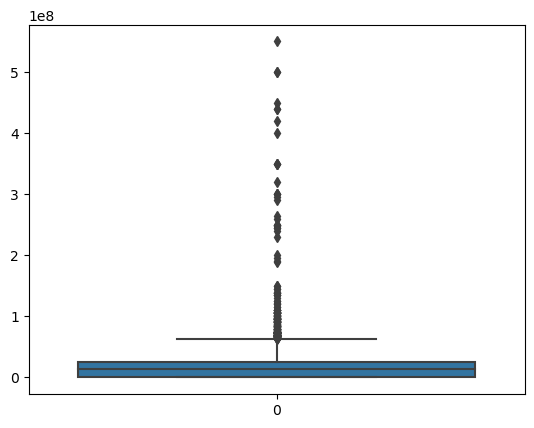

In [14]:
sns.boxplot(df1['PRICE'])

<Axes: ylabel='PRICE'>

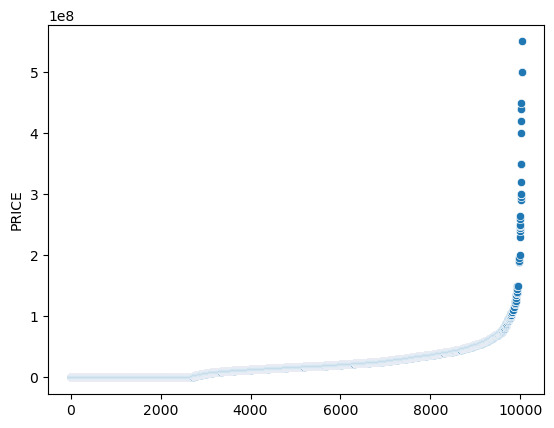

In [15]:
sns.scatterplot(df1['PRICE'])

##. Max price of the "residential apartment" is 550000000.
 
##. Min Price of the "residential apartment" is 5500

<Axes: ylabel='PRICE'>

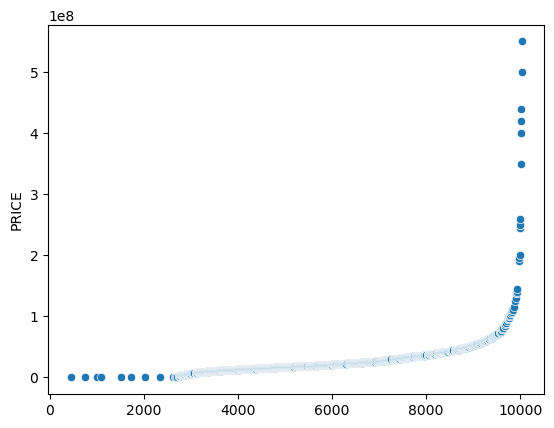

In [23]:
sns.scatterplot(sale_rows['PRICE'])

<Axes: xlabel='PRICE'>

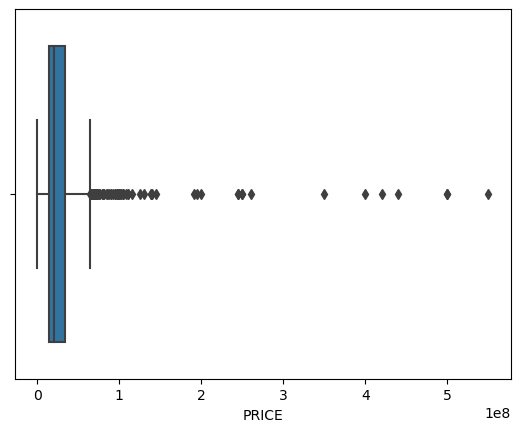

In [24]:
sns.boxplot(x =sale_rows['PRICE'])

<Axes: xlabel='PRICE'>

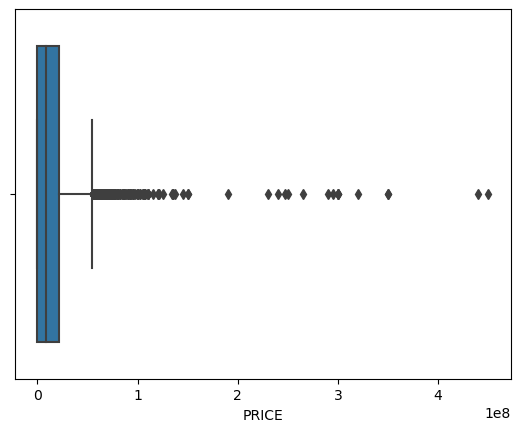

In [35]:
sns.boxplot(x =rent_rows['PRICE'])

<Axes: xlabel='PRICE'>

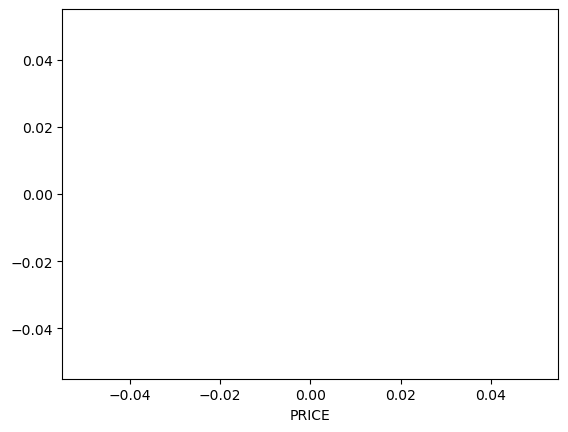

In [36]:
sns.scatterplot(x =rent_rows['PRICE'])

In [28]:
rent_rows['PRICE'].max()

450000000.0

In [32]:
rent_rows[rent_rows['PRICE'] ==450000000.0]

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER,EXTRACTION_RESULT
10026,21691299,q21691299,gurgaon,450000000.0,49046.0,9175.0,15.0,5 bhk flat in sector 42 gurgaon,"duplex house, corner unit is available at high...",residential apartment,Semifurnished,5,0-1 Year Old Property,high rise,5.0,dlf the magnolias,4.0,high rise,28.45382,77.09956,5.0,sector 42 gurgaon,dlf the magnolias,dlf the magnolias,dlf phase-5. near rapid metro station,2,2,0,3,2,1,126,1,3,rent


<Axes: ylabel='AREA'>

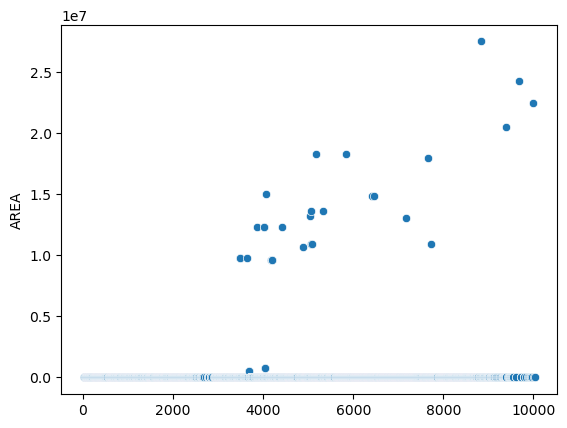

In [151]:
sns.scatterplot(df1['AREA'])

<Axes: xlabel='AREA'>

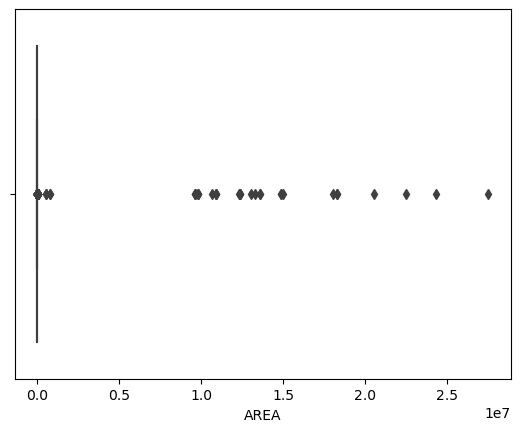

In [153]:
sns.boxplot(x =df1['AREA'])

In [47]:
rent_rows['PRICE'].describe()

count    4.243000e+03
mean     1.584624e+07
std      2.691440e+07
min      5.500000e+03
25%      5.700000e+04
50%      9.000000e+06
75%      2.200000e+07
max      4.500000e+08
Name: PRICE, dtype: float64

## Observations
Sales Date: 
   1. Observe some data error: there is some 3 , 4, 5 bhk property whch is less than 100000 
   2. maximumm price of the property is 550000000
   3. Min price of the property is 30000
   
rent_rows:
   1. Observe some data error : 
   2. maximumm price iprice of the property is 450000000
   3. Min price of the property is 5500


## independent/builder floor

In [49]:
df['PROPERTY_TYPE'].value_counts()

residential apartment        5952
independent/builder floor    2470
residential land              989
independent house/villa       621
Name: PROPERTY_TYPE, dtype: int64

In [55]:
df[df['PROPERTY_TYPE'] == 'independent/builder floor'].sample(4)

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER
9544,69624186,t69624186,gurgaon,72500000.0,16046.0,4518.0,47.0,4 bhk independent builder floor in dlf phase 1,brand new builder floor in dlf-1 gated lane. 5...,independent/builder floor,Semifurnished,5,5-10 Year Old Property,mid rise,4.0,brand new builder floor,2.0,low rise,28.462340,77.085755,4.0,dlf phase 1,brand new builder floor,brand new builder floor,NaN,3,6,0,2,12,2,30,2,0
3155,70609904,l70609904,gurgaon,8400000.0,8316.0,1010.0,10.0,2 bhk independent builder floor in sector 92 g...,"signature premium floors in sec 92, modular ki...",independent/builder floor,Semifurnished,0,1-5 Year Old Property,mid rise,2.0,signature global city 92,2.0,low rise,28.412695,76.917442,2.0,sector 92 gurgaon,signature global city 92,signature global city 92,NaN,1,1,1,3,1,2,49,1,2
4924,62597298,f62597298,gurgaon,16900000.0,8450.0,2000.0,45.0,3 bhk independent builder floor in sector 50 g...,luxurious & vastu compliant builder floor on 1...,independent/builder floor,Semifurnished,0,5-10 Year Old Property,low rise,3.0,unitech south city 2,3.0,low rise,28.416043,77.059325,3.0,sector 50 gurgaon,unitech south city 2,unitech south city 2,NaN,0,1,1,0,16,1,93,0,1
6978,70748260,v70748260,gurgaon,26500000.0,99250.0,2403.0,10.0,3 bhk independent builder floor in sector 65 g...,available for sale 3 bhk +sq ground floor emaa...,independent/builder floor,Semifurnished,3,0-1 Year Old Property,low rise,3.0,emaar emerald hills,3.0,low rise,28.407289,77.069686,3.0,sector 65 gurgaon,emaar emerald hills,emaar emerald hills,jema block ground floor 3 bhk,1,1,1,2,1,1,76,1,2


In [53]:
df5 = df[df['PROPERTY_TYPE'] == 'independent/builder floor']

In [54]:
df5.shape

(2470, 34)

In [69]:
df5['PRICE'].describe()

count    2.470000e+03
mean     2.013264e+07
std      3.044101e+07
min      1.299900e+04
25%      1.700000e+05
50%      1.890000e+07
75%      2.800000e+07
max      1.200000e+09
Name: PRICE, dtype: float64

In [57]:
sale_rows =df5[df5['DESCRIPTION'].str.contains("sale")]
rent_rows =df5[df5['DESCRIPTION'].str.contains("rent")]

In [59]:
rent_rows.shape

(448, 34)

In [58]:
sale_rows.shape

(604, 34)

In [67]:
df5['PRICE'].max()

1200000000.0

In [62]:
df5['PRICE'].min()

12999.0

In [64]:
df5[df['PRICE'] ==12999.0]

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER
20,70318584,v70318584,gurgaon,12999.0,8.0,1464.0,32.0,1 bhk independent builder floor in sector 22 g...,only 1 big sie bed room set available for rent...,independent/builder floor,Semifurnished,4,1-5 Year Old Property,low rise,1.0,saksham welfare association,2.0,low rise,28.506825,77.063642,1.0,sector 22 gurgaon,saksham welfare association,saksham welfare association,NaN,0,2,2,0,4,2,20,1,0


<Axes: xlabel='PRICE'>

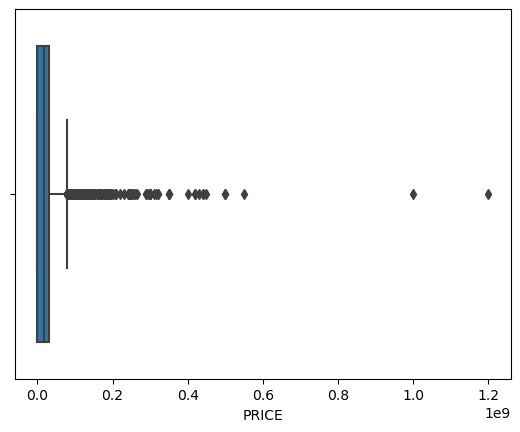

In [65]:
sns.boxplot(x =df['PRICE'] )

<Axes: xlabel='PRICE'>

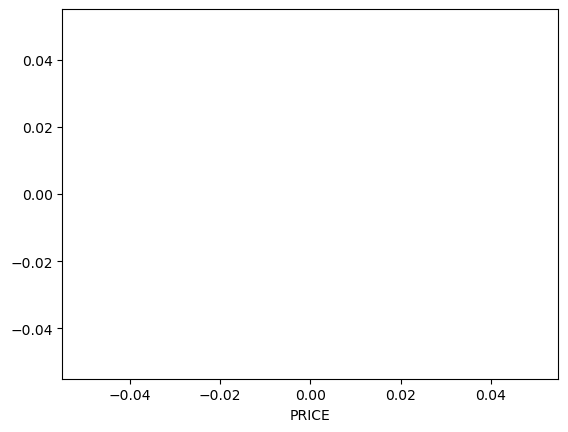

In [68]:
sns.scatterplot(x =df['PRICE'] )

<Axes: xlabel='AREA'>

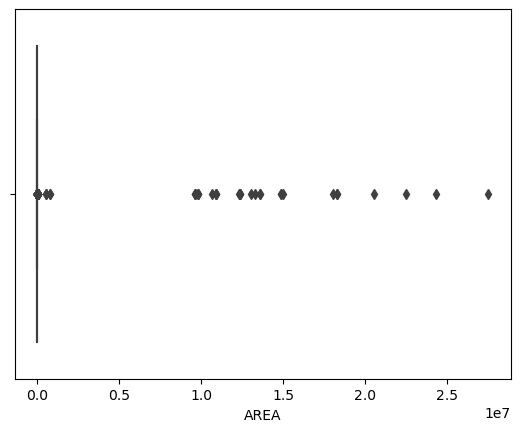

In [154]:
sns.boxplot(x =df5['AREA'])

<Axes: ylabel='AREA'>

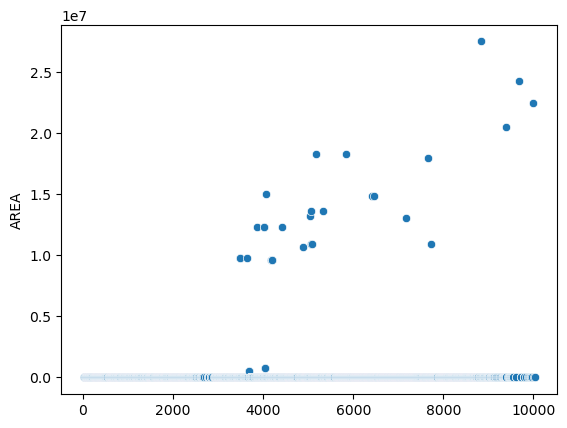

In [157]:
sns.scatterplot(df5['AREA'])

## Observation

1. Observed some outilers


## residential land

In [72]:
df6 =df[df['PROPERTY_TYPE'] =='residential land']

In [73]:
sale_rows =df6[df6['DESCRIPTION'].str.contains("sale")]
rent_rows =df6[df6['DESCRIPTION'].str.contains("rent")]

In [76]:
rent_rows.shape

(71, 34)

In [74]:
sale_rows.shape

(349, 34)

In [78]:
df6['PRICE'].describe()

count    9.890000e+02
mean     4.762018e+07
std      5.266860e+07
min      2.300000e+05
25%      1.830000e+07
50%      3.550000e+07
75%      5.920000e+07
max      1.000000e+09
Name: PRICE, dtype: float64

In [79]:
df6['PRICE'].max()

1000000000.0

In [87]:
df6['PRICE'].min()

230000.0

In [88]:
df6[df6['PRICE'] == 230000.0]

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER
2598,70515244,r70515244,gurgaon,230000.0,958.0,2160.0,45.0,residential land / plot in malibu town,"lemon street, malibu town, gurgaon, haryana\n3...",residential land,not available,3,0-1 Year Old Property,low rise,NaN,malibu towne,NaN,low rise,28.425675,77.043508,NaN,malibu town,malibu towne,malibu towne,NaN,0,2,1,0,18,1,24,0,0


In [82]:
df6[df6['PRICE'] == 1000000000]

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER
10030,70231990,t70231990,gurgaon,1.000000e+09,160000000.0,272250.0,6.0,residential land / plot in sector 78 gurgaon,available for sale 6.25 acres rate of 16cr per...,residential land,not available,3,0-1 Year Old Property,mid rise,NaN,"shikopur village sector 78, gurgaon",NaN,low rise,28.373276,76.972947,78.0,sector 78 gurgaon,"shikopur village sector 78, gurgaon","shikopur village sector 78, gurgaon",1.25 acres and 6.25acres land,0,0,0,0,0,3,24,1,0


In [94]:
df6 = df[df['PRICE'] != 70231990]

<Axes: ylabel='PRICE'>

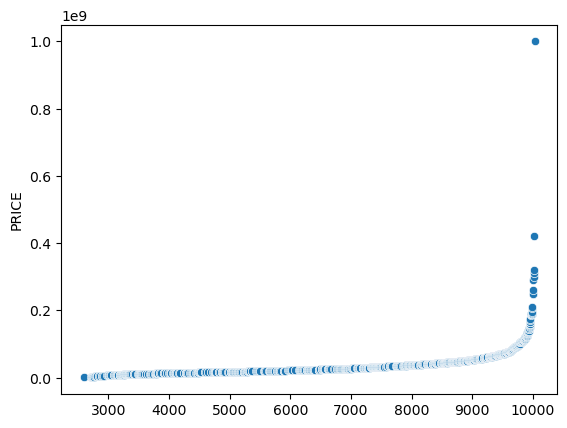

In [84]:
sns.scatterplot(df6['PRICE'])

<Axes: xlabel='PRICE'>

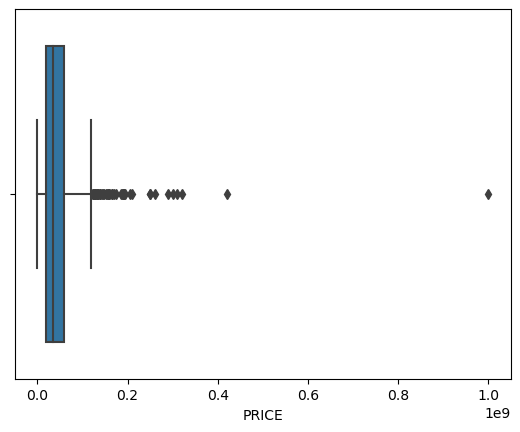

In [86]:
sns.boxplot(x =
            df6['PRICE'])

<Axes: xlabel='AREA'>

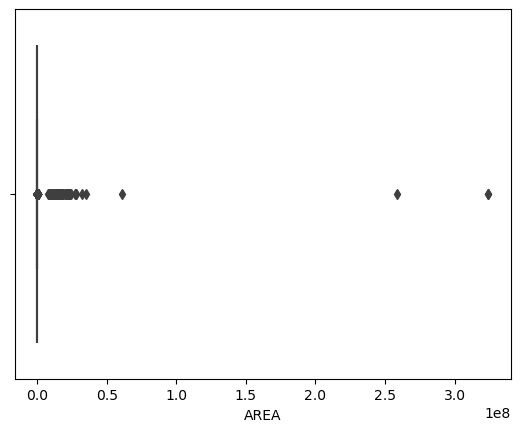

In [96]:
sns.boxplot(x =df6['AREA'])

<Axes: ylabel='AREA'>

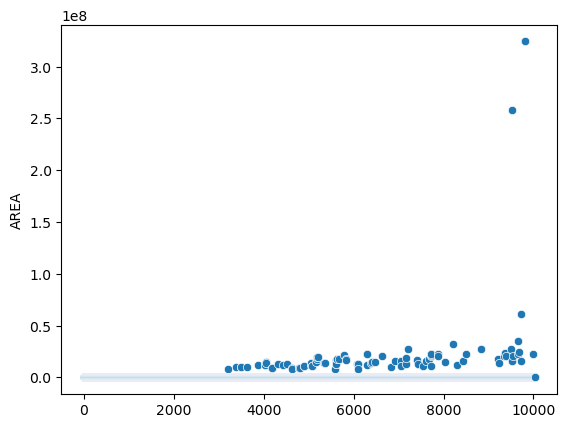

In [97]:
sns.scatterplot(df6['AREA'])

## independent house/villa 

In [98]:
df7 = df[df['PROPERTY_TYPE'] =='independent house/villa']

In [99]:
df7.shape

(621, 34)

In [127]:
sale_rows =df7[df7['DESCRIPTION'].str.contains("sale")]
rent_rows =df7[df7['DESCRIPTION'].str.contains("rent" ,'monthly')]

In [128]:
print(sale_rows.shape)
print(rent_rows.shape)

(224, 34)
(150, 34)


In [104]:
df7['PRICE'].max()

430000000.0

In [105]:
df[df['PRICE'] ==430000000.0]

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER
10023,70365666,e70365666,gurgaon,430000000.0,420743.0,9198.0,46.0,9 bedroom house in dlf phase 1,avl for sale 1022 yards luxurious kothi prime ...,independent house/villa,Semifurnished,5,0-1 Year Old Property,low rise,9.0,NaN,4.0,low rise,28.475491,77.10321,9.0,dlf phase 1,NaN,NaN,NaN,6,1,0,0,21,1,51,0,2


In [106]:
df7['PRICE'].min()

12000.0

In [138]:
df7[df7['PRICE'] ==12000.0]

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER
17,70811510,g70811510,gurgaon,12000.0,75.0,1440.0,50.0,2 bedroom house in acharya puri extension,this is my own property available on 1st floor...,independent house/villa,Unfurnished,5,5-10 Year Old Property,low rise,2.0,NaN,2.0,low rise,28.469359,77.032194,2.0,acharya puri extension,NaN,NaN,NaN,0,0,0,1,40,2,18,0,0


In [139]:
df7[df7['PRICE'] <=12000.0]['DESCRIPTION'].explode().tolist()

['this is my own property available on 1st floor. this house is close to the bus stand and markit. land mark is mamta hospital. call for more detail n visit.']

<Axes: xlabel='PRICE'>

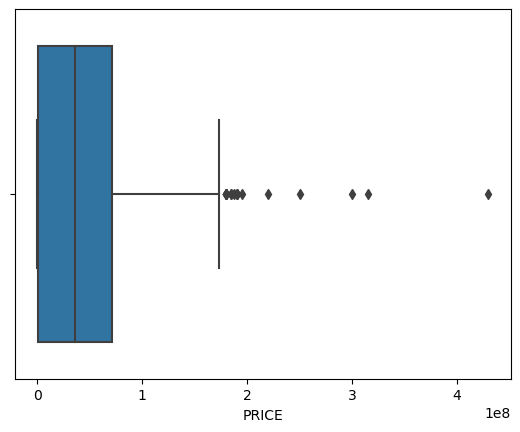

In [131]:
sns.boxplot(x =df7['PRICE'])

<Axes: ylabel='PRICE'>

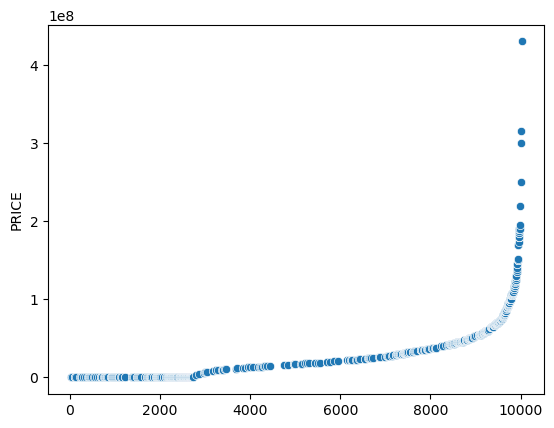

In [133]:
sns.scatterplot(df7['PRICE'])

In [137]:
df7[df7['PRICE'] >=200000000.0].shape

(5, 34)

<Axes: xlabel='AREA'>

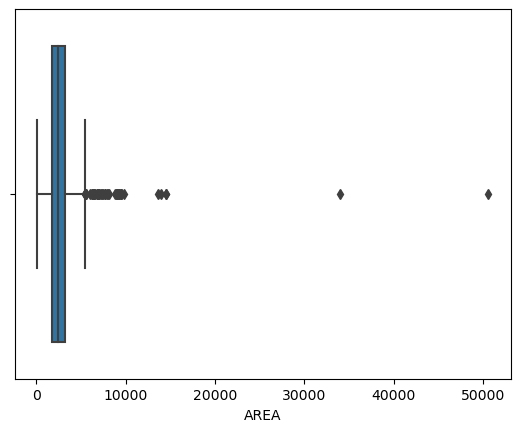

In [142]:
sns.boxplot(x =df7['AREA'])

<Axes: ylabel='AREA'>

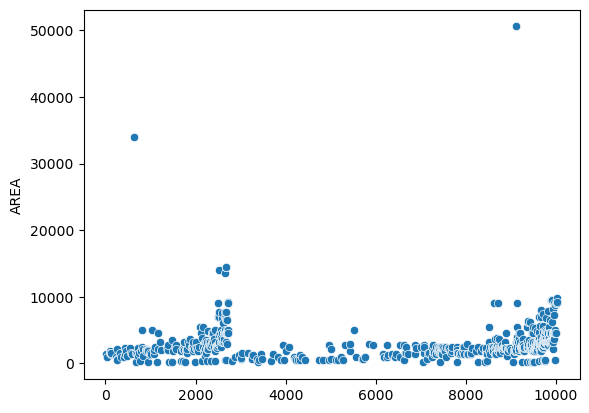

In [146]:
sns.scatterplot(df7['AREA'])

In [149]:
df7[df7['AREA'] >=30000]

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,TOTAL_LANDMARK_COUNT,PROP_HEADING,DESCRIPTION,PROPERTY_TYPE,FURNISH,FACING,AGE,TOTAL_FLOOR,BEDROOM_NUM,PROP_NAME,BALCONY_NUM,FLOOR_NUM,LATITUDE,LOGNITUDE,BHK_BED,LOCALITY_NAME,BUILDING_NAME,SOCIETY_NAME,ADDRESS,TRNSPORTATION,ACCOMODATION,LEISURE,EDUCATION,HEALTH,OTHER,AMENITIES_SCORE,LANDMARKS_CLUSTER,LANDMARKS_N_SCORES_CLUSTER
642,69913556,p69913556,gurgaon,35000.0,1.0,34000.0,49.0,3 bedroom house in sector 10a gurgaon,rent this 3 bhk house in gurgaon's most sought...,independent house/villa,Semifurnished,3,5-10 Year Old Property,low rise,3.0,NaN,3.0,low rise,28.445676,77.007452,3.0,sector 10a gurgaon,NaN,NaN,NaN,0,0,2,0,42,1,35,0,0
9116,70096892,p70096892,gurgaon,55000000.0,11316.0,50580.0,47.0,8 bedroom house in mayfield garden,240sqyd 8bhk servant room ultra luxury kothi p...,independent house/villa,Semifurnished,5,0-1 Year Old Property,low rise,8.0,NaN,2.0,low rise,28.424140,77.061480,8.0,mayfield garden,NaN,NaN,12356,0,1,1,0,16,1,51,0,2
